In [31]:
import networkx as nx
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

# 1. Network of Thrones - books

https://github.com/mathbeveridge/asoiaf

These networks were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books in "A Song of Ice and Fire." 

The edge weight corresponds to the number of interactions.

In [2]:
# all
thrones = pd.read_csv("asoiaf/data/asoiaf-all-edges.csv")
labels = pd.read_csv("asoiaf/data/asoiaf-all-nodes.csv")

# separate books

thrones1 = pd.read_csv("asoiaf/data/asoiaf-book1-edges.csv")
thrones2 = pd.read_csv("asoiaf/data/asoiaf-book2-edges.csv")
thrones3 = pd.read_csv("asoiaf/data/asoiaf-book3-edges.csv")
thrones4 = pd.read_csv("asoiaf/data/asoiaf-book4-edges.csv")
thrones45 = pd.read_csv("asoiaf/data/asoiaf-book45-edges.csv")
thrones5 = pd.read_csv("asoiaf/data/asoiaf-book5-edges.csv")

labels1 = pd.read_csv("asoiaf/data/asoiaf-book1-nodes.csv")
labels2 = pd.read_csv("asoiaf/data/asoiaf-book2-nodes.csv")
labels3 = pd.read_csv("asoiaf/data/asoiaf-book3-nodes.csv")
labels4 = pd.read_csv("asoiaf/data/asoiaf-book4-nodes.csv")
labels45 = pd.read_csv("asoiaf/data/asoiaf-book45-nodes.csv")
labels5 = pd.read_csv("asoiaf/data/asoiaf-book5-nodes.csv")


In [8]:
thrones1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [24]:
G = nx.from_pandas_edgelist(thrones1, 'Source', 'Target', edge_attr='weight')

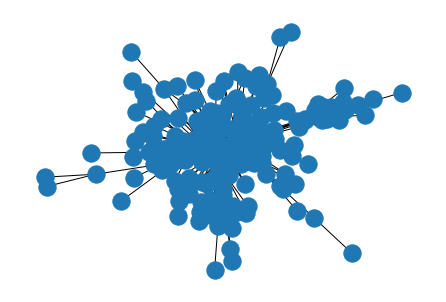

In [25]:
nx.draw(G)

plt.show()

In [29]:
nx.get_edge_attributes(G, name = 'weight')

{('Addam-Marbrand', 'Jaime-Lannister'): 3,
 ('Addam-Marbrand', 'Tywin-Lannister'): 6,
 ('Jaime-Lannister', 'Aerys-II-Targaryen'): 5,
 ('Jaime-Lannister', 'Barristan-Selmy'): 4,
 ('Jaime-Lannister', 'Brynden-Tully'): 7,
 ('Jaime-Lannister', 'Catelyn-Stark'): 9,
 ('Jaime-Lannister', 'Cersei-Lannister'): 16,
 ('Jaime-Lannister', 'Eddard-Stark'): 27,
 ('Jaime-Lannister', 'Edmure-Tully'): 4,
 ('Jaime-Lannister', 'Galbart-Glover'): 3,
 ('Jaime-Lannister', 'Gregor-Clegane'): 3,
 ('Jaime-Lannister', 'Harys-Swyft'): 3,
 ('Jaime-Lannister', 'Joffrey-Baratheon'): 12,
 ('Jaime-Lannister', 'Jon-Arryn'): 5,
 ('Jaime-Lannister', 'Jory-Cassel'): 4,
 ('Jaime-Lannister', 'Kevan-Lannister'): 4,
 ('Jaime-Lannister', 'Loras-Tyrell'): 3,
 ('Jaime-Lannister', 'Lysa-Arryn'): 6,
 ('Jaime-Lannister', 'Petyr-Baelish'): 7,
 ('Jaime-Lannister', 'Renly-Baratheon'): 4,
 ('Jaime-Lannister', 'Rickard-Karstark'): 3,
 ('Jaime-Lannister', 'Robb-Stark'): 9,
 ('Jaime-Lannister', 'Robert-Baratheon'): 24,
 ('Jaime-Lannister'

In [32]:
np.mean([d for _, d in G.degree()])

7.315508021390374

In [33]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

[('Eddard-Stark', 66),
 ('Robert-Baratheon', 50),
 ('Tyrion-Lannister', 46),
 ('Catelyn-Stark', 43),
 ('Jon-Snow', 37),
 ('Robb-Stark', 35),
 ('Sansa-Stark', 35),
 ('Bran-Stark', 32),
 ('Cersei-Lannister', 30),
 ('Joffrey-Baratheon', 30)]

In [56]:
d = dict(G.degree)

widths = list(nx.get_edge_attributes(G,'weight').values())


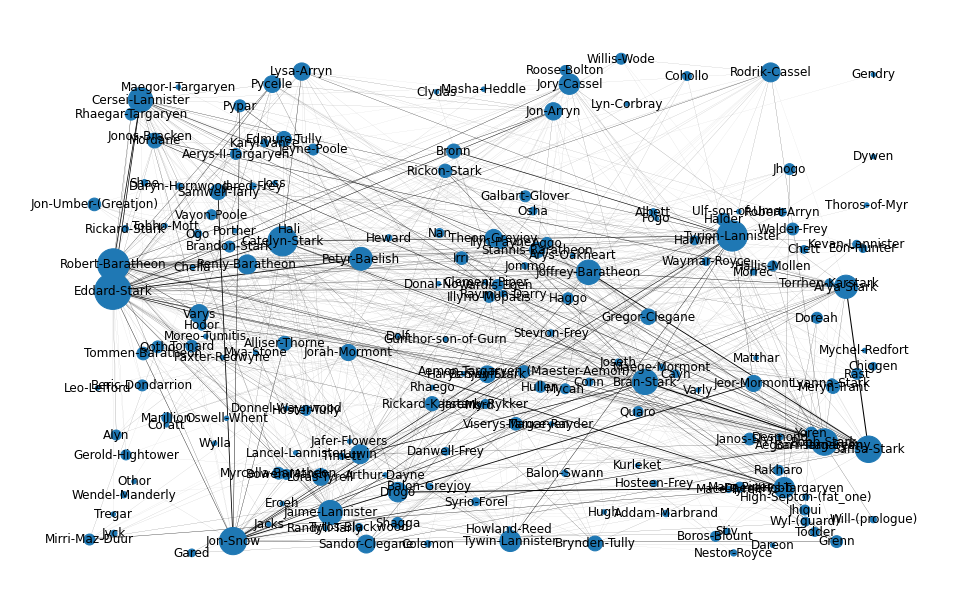

In [57]:
fig, ax = plt.subplots(figsize=(17, 11))
ax.axis('off')
plot_options = {"node_size": [v * 20 for v in d.values()], "with_labels": True, "width": [w / 100 for w in widths]}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

## Shortest path length

In [48]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [50]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

7

Text(0, 0.5, 'Frequency (%)')

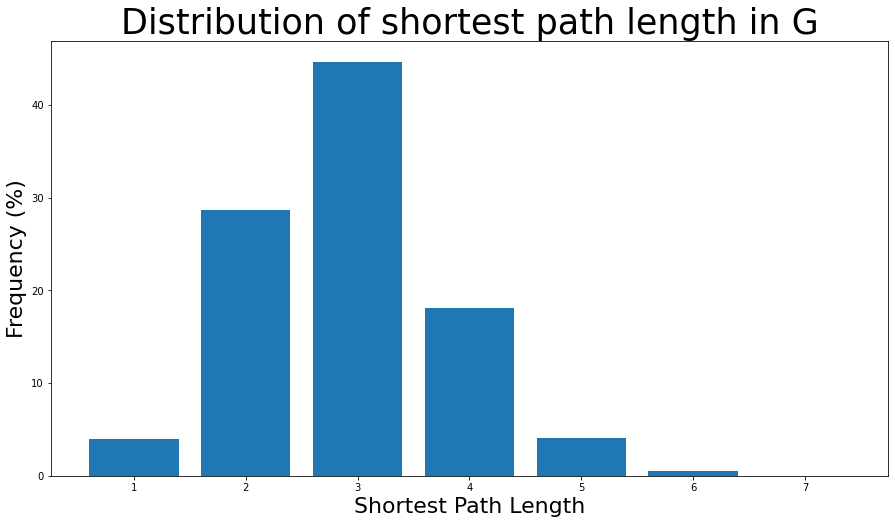

In [51]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})

## Centrality measures

In [52]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819)]

Text(0, 0.5, 'Counts')

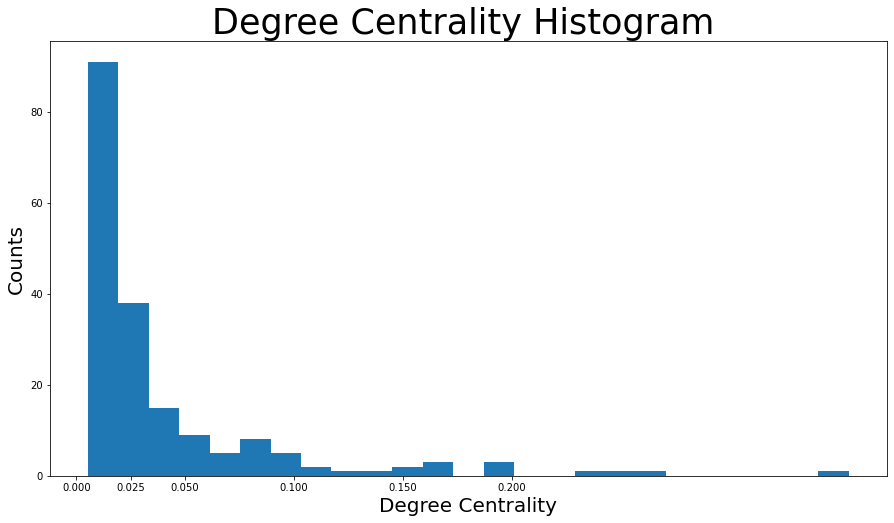

In [53]:
plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-1.1910612669154796,
 1.010692380396238,
 -1.009042421589196,
 0.8410784444249896)

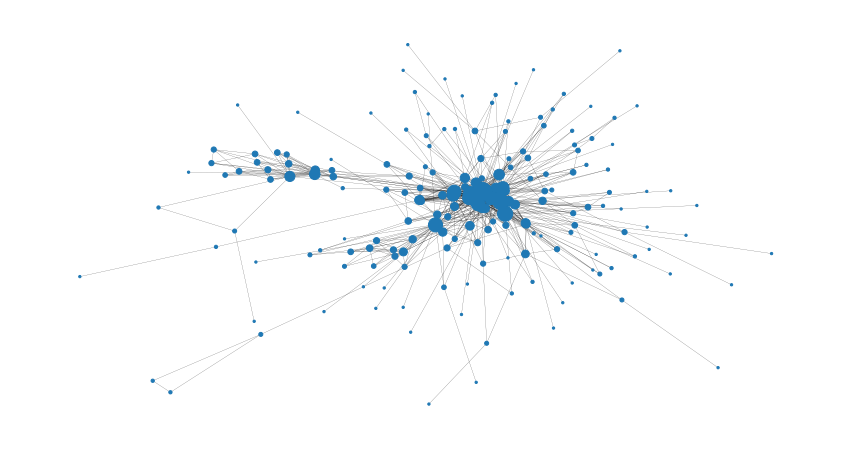

In [55]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
node_size =  [v * 1000 for v in degree_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

# 2. Network of Thrones - HBO series

https://github.com/mathbeveridge/gameofthrones

There are five interaction types. Character A and Character B are connected whenever:

    1. Character A speaks directly after Character B
    2. Character A speaks about Character B
    3. Character C speaks about Character A and Character B
    4. Character A and Character B are mentioned in the same stage direction
    5. Character A and Character B appear in a scene together


The edge weight corresponds to the number of interactions.

In [74]:
# separate books

thrones1series = pd.read_csv("gameofthrones/data/got-s1-edges.csv")
labels1series = pd.read_csv("gameofthrones/data/got-s1-nodes.csv")



In [75]:
thrones1series.head()

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


In [76]:
labels1series.head()

super_map = pd.Series(labels1series.Label.values,index=labels1series.Id).to_dict() 


In [77]:
thrones1series['Source'] = thrones1series['Source'].map(super_map)
thrones1series['Target'] = thrones1series['Target'].map(super_map)
thrones1series.head()

,Source,Target,Weight,Season
0,Ned,Robert,192,1
1,Daenerys,Jorah,154,1
2,Jon,Sam,121,1
3,Petyr,Ned,107,1
4,Ned,Varys,96,1


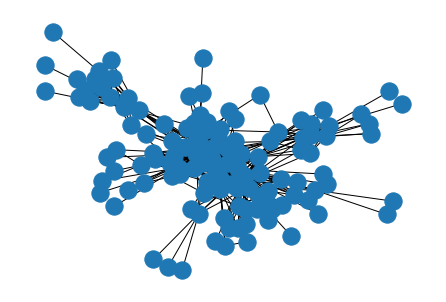

In [82]:
G = nx.from_pandas_edgelist(thrones1series, 'Source', 'Target', edge_attr='Weight')

nx.draw(G)

plt.show()




In [83]:
nx.get_edge_attributes(G, name = 'Weight')



{('Ned', 'Robert'): 192,
 ('Ned', 'Petyr'): 107,
 ('Ned', 'Varys'): 96,
 ('Ned', 'Arya'): 90,
 ('Ned', 'Cersei'): 86,
 ('Ned', 'Catelyn'): 69,
 ('Ned', 'Pycelle'): 68,
 ('Ned', 'Jaime'): 53,
 ('Ned', 'Sansa'): 49,
 ('Ned', 'Jory'): 44,
 ('Ned', 'Joffrey'): 39,
 ('Ned', 'Renly'): 30,
 ('Ned', 'Bran'): 29,
 ('Ned', 'Jon'): 29,
 ('Ned', 'Barristan'): 25,
 ('Ned', 'Robb'): 23,
 ('Ned', 'Yoren'): 15,
 ('Ned', 'Benjen'): 14,
 ('Ned', 'Janos'): 13,
 ('Ned', 'Theon'): 13,
 ('Ned', 'Gendry'): 12,
 ('Ned', 'Jon Arryn'): 12,
 ('Ned', 'Tyrion'): 11,
 ('Ned', 'Tywin'): 11,
 ('Ned', 'Sandor'): 10,
 ('Ned', 'Rodrik'): 10,
 ('Ned', 'Stannis'): 10,
 ('Ned', 'Tobho Mott'): 10,
 ('Ned', 'Mhaegen'): 9,
 ('Ned', 'Septa Mordane'): 9,
 ('Ned', 'Aerys'): 8,
 ('Ned', 'Baelor'): 8,
 ('Ned', 'Hugh of the Vale'): 6,
 ('Ned', 'Syrio'): 6,
 ('Ned', 'Tomard'): 6,
 ('Ned', 'Luwin'): 5,
 ('Ned', 'Gregor'): 5,
 ('Ned', 'Ilyn'): 4,
 ('Ned', 'Lancel'): 4,
 ('Ned', 'Loras'): 4,
 ('Ned', 'Lyanna'): 4,
 ('Ned', 'Rickard Sta

In [87]:
np.mean([d for _, d in G.degree()])

8.714285714285714

In [88]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

[('Ned', 57),
 ('Tyrion', 41),
 ('Robert', 36),
 ('Catelyn', 36),
 ('Robb', 30),
 ('Cersei', 29),
 ('Arya', 28),
 ('Joffrey', 27),
 ('Jon', 26),
 ('Petyr', 26)]

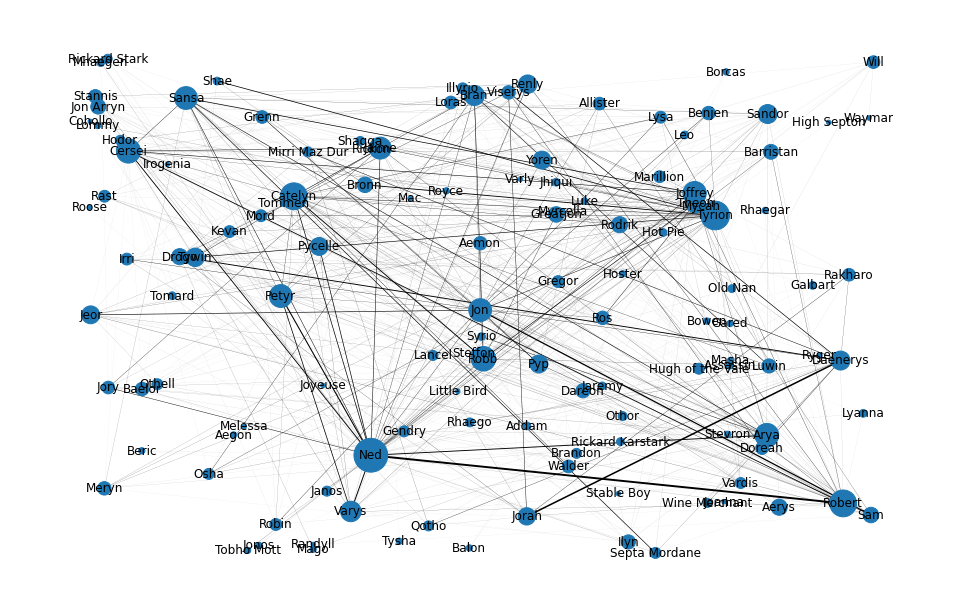

In [84]:


d = dict(G.degree)

widths = list(nx.get_edge_attributes(G,'Weight').values())


fig, ax = plt.subplots(figsize=(17, 11))
ax.axis('off')
plot_options = {"node_size": [v * 20 for v in d.values()], "with_labels": True, "width": [w / 100 for w in widths]}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)


## Shortest path length

Text(0, 0.5, 'Frequency (%)')

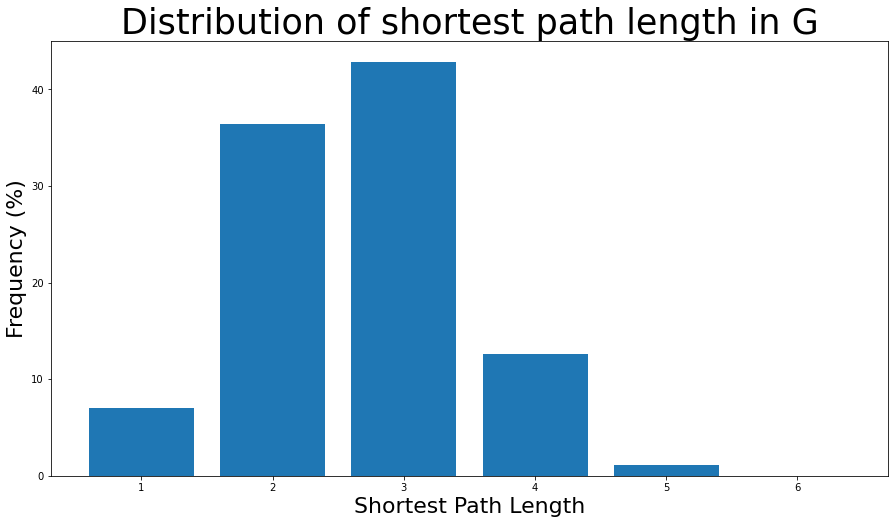

In [85]:

shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})





## Centrality measures

(-1.2020977940712185,
 1.1268386899875875,
 -0.8355970188231532,
 0.9660601337037066)

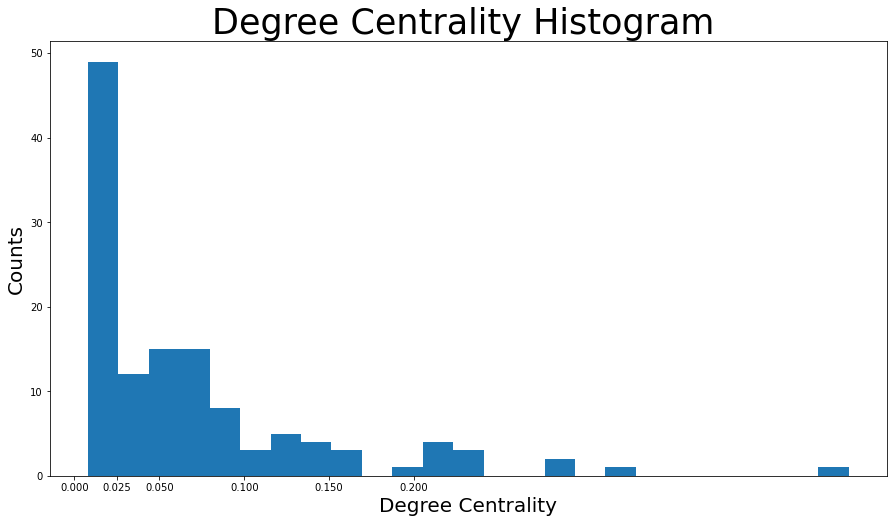

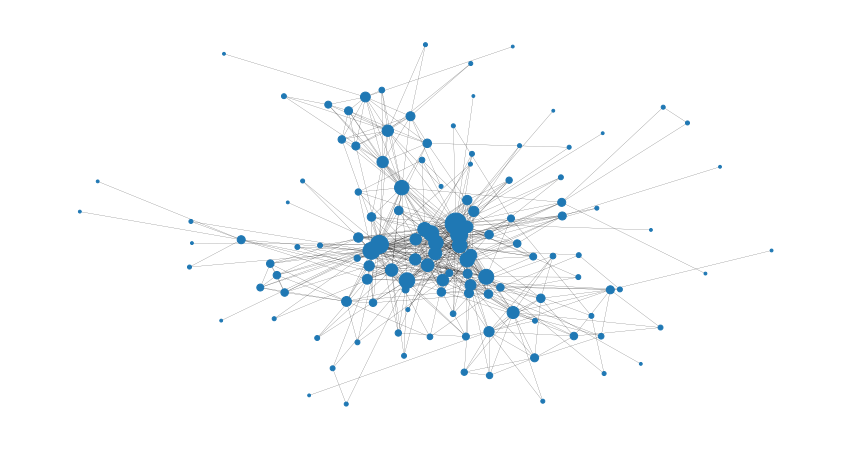

In [86]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

pos = nx.spring_layout(G, iterations=15, seed=1721)
node_size =  [v * 1000 for v in degree_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

# 3. Openflights

https://networkrepository.com/inf-openflights.php
    
The data is downloaded from Openflights.org. Unlike the BTS data, this dataset contains ties between two non-US-based airports. 

In [125]:
openflights = pd.read_csv("infopenflights/inf-openflights.edges", comment = "%", header = None, sep = " ").loc[:, [0,1]]

In [126]:
openflights.head()

,0,1
0,1,2
1,3,4
2,3,2
3,3,5
4,3,6


In [127]:
openflights.columns = ['Source', 'Target']

In [128]:
openflights.head()

,Source,Target
0,1,2
1,3,4
2,3,2
3,3,5
4,3,6


In [133]:
max(np.unique(openflights["Source"])) # 2939 different aeroports

2939

In [95]:
G = nx.from_pandas_edgelist(openflights, 'Source', 'Target')

# nx.draw(G)

# plt.show()

In [96]:
np.mean([d for _, d in G.degree()])

10.668254508336169

In [97]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

[(53, 242),
 (65, 218),
 (59, 211),
 (56, 172),
 (259, 170),
 (297, 169),
 (411, 168),
 (308, 166),
 (366, 160),
 (57, 159)]

In [98]:
d = dict(G.degree)


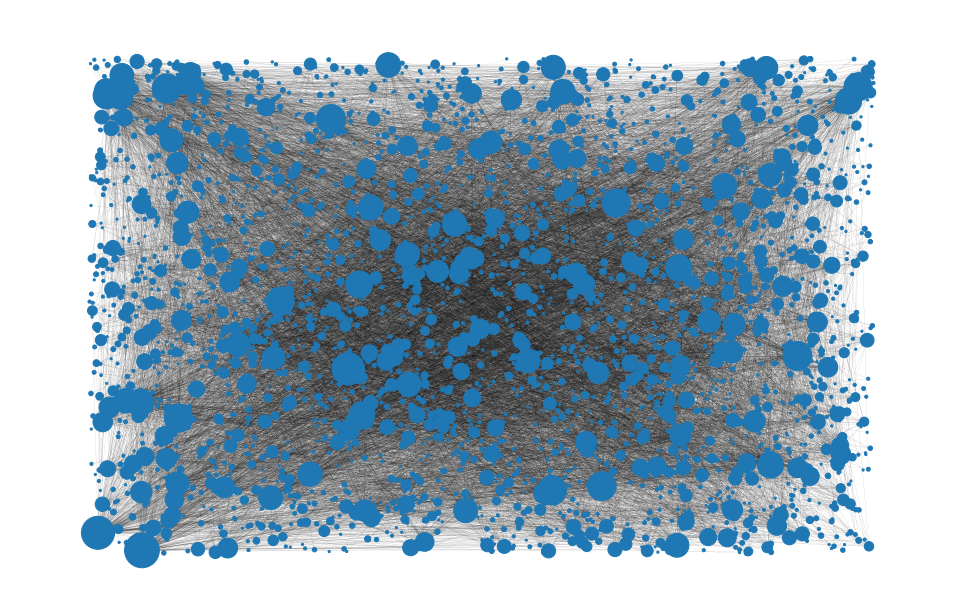

In [104]:
fig, ax = plt.subplots(figsize=(17, 11))
ax.axis('off')
plot_options = {"node_size": [v * 5 for v in d.values()], "with_labels": False, "width": 0.05}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

## Shortest path length

In [105]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

NetworkXError: Found infinite path length because the graph is not connected

In [121]:
nx.is_connected(G) 

False

It means there is at least 1 pair of aeroports that is not linked by air communication and we have to travel between these 2 aeroports by other means, e.g. by train.

In [156]:
nx.number_connected_components(G)

11

There are 11 such sets of aeroports that we cannot travel to from the aeroport belonging to another set.

## Centrality measures

(-1.2071784171462059,
 1.180306199491024,
 -0.8160848197340965,
 1.0492744621634482)

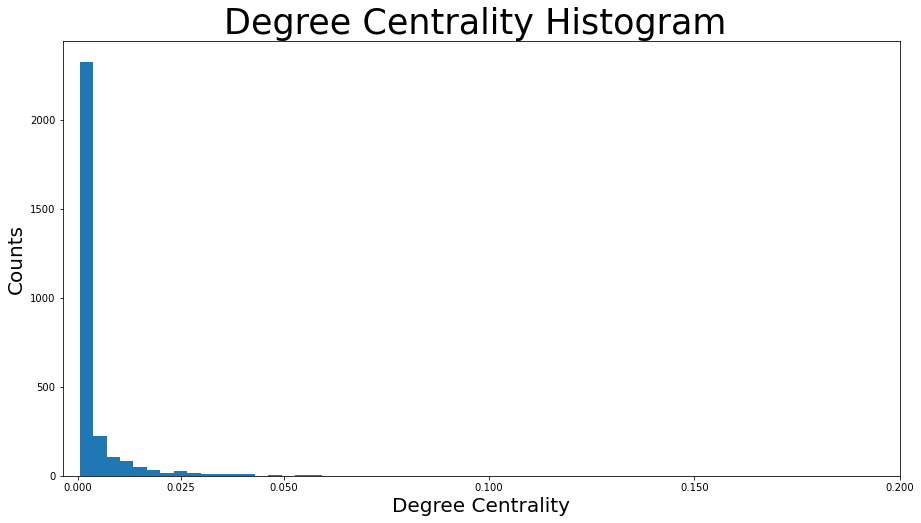

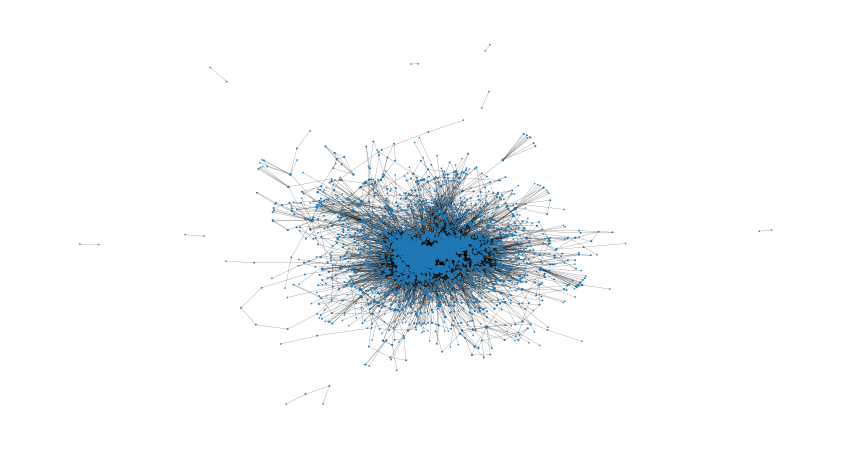

In [124]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

pos = nx.spring_layout(G, iterations=15, seed=1721)
node_size =  [v * 1000 for v in degree_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

# World Soccer Data Paris 1998

http://vlado.fmf.uni-lj.si/pub/networks/data/sport/football.htm
    
Our network example describes the 22 soccer teams which participated in the World Championship in Paris, 1998. 

Counting which team exports how many players to which country can be described with a valued, asymmetric graph. The graph is highly unsymmetric: some countries only export players, some countries are only importers. 

In [178]:
football_nodes = pd.read_csv("football/nodes.txt", sep = "\s", header = None).loc[:,[0,1,5,6,7]]

C:\Users\Patryk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [158]:
football_nodes.head()

,0,1,5,6,7
0,1,"""ARG""",0.3784,0.7257,0.5
1,2,"""AUT""",0.7070,0.3091,0.5
2,3,"""BEL""",0.3112,0.3627,0.5
3,4,"""BGR""",0.4901,0.2231,0.5
4,5,"""BRA""",0.4183,0.8734,0.5


In [161]:
football_nodes

,0,1,5,6,7
0,1,"""ARG""",0.3784,0.7257,0.5
1,2,"""AUT""",0.7070,0.3091,0.5
2,3,"""BEL""",0.3112,0.3627,0.5
3,4,"""BGR""",0.4901,0.2231,0.5
4,5,"""BRA""",0.4183,0.8734,0.5
5,6,"""CHE""",0.8277,0.7710,0.5
6,7,"""CHL""",0.0570,0.4660,0.5
7,8,"""CMR""",0.6661,0.4183,0.5
8,9,"""COL""",0.1708,0.7309,0.5
9,10,"""DEU""",0.6178,0.2022,0.5


In [196]:
data = pd.read_csv("football/new_edges.csv", index_col = 0, sep = ",")

In [198]:
data.columns = ['Source', 'Target', 'weight']

In [199]:
data

,Source,Target,weight
1,1,12,4
2,1,18,9
3,2,10,7
4,2,12,1
5,2,13,1
...,...,...,...
114,35,13,1
115,35,14,4
116,35,18,1
117,35,25,2


In [202]:
super_map = pd.Series(football_nodes.iloc[:,1].values,index=football_nodes.iloc[:,0]).to_dict() 

In [203]:
super_map

{1: '"ARG"',
 2: '"AUT"',
 3: '"BEL"',
 4: '"BGR"',
 5: '"BRA"',
 6: '"CHE"',
 7: '"CHL"',
 8: '"CMR"',
 9: '"COL"',
 10: '"DEU"',
 11: '"DNK"',
 12: '"ESP"',
 13: '"FRA"',
 14: '"GBR"',
 15: '"GRE"',
 16: '"HRV"',
 17: '"IRN"',
 18: '"ITA"',
 19: '"JAM"',
 20: '"JPN"',
 21: '"KOR"',
 22: '"MAR"',
 23: '"MEX"',
 24: '"NGA"',
 25: '"NLD"',
 26: '"NOR"',
 27: '"PRT"',
 28: '"PRY"',
 29: '"ROM"',
 30: '"SCO"',
 31: '"TUN"',
 32: '"TUR"',
 33: '"USA"',
 34: '"YUG"',
 35: '"ZAF"'}

In [204]:
data['Source'] = data['Source'].map(super_map)
data['Target'] = data['Target'].map(super_map)
data.head()

,Source,Target,weight
1,"""ARG""","""ESP""",4
2,"""ARG""","""ITA""",9
3,"""AUT""","""DEU""",7
4,"""AUT""","""ESP""",1
5,"""AUT""","""FRA""",1


In [225]:
G = nx.from_pandas_edgelist(data, 'Source', 'Target', edge_attr='weight', create_using=nx.DiGraph())

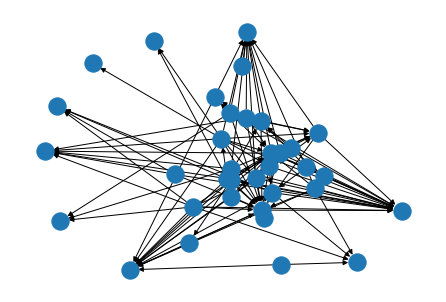

In [226]:
nx.draw(G)

plt.show()

In [227]:
nx.get_edge_attributes(G, name = 'weight')

{('"ARG"', '"ESP"'): 4,
 ('"ARG"', '"ITA"'): 9,
 ('"ITA"', '"ESP"'): 2,
 ('"ITA"', '"FRA"'): 1,
 ('"ITA"', '"GBR"'): 2,
 ('"AUT"', '"DEU"'): 7,
 ('"AUT"', '"ESP"'): 1,
 ('"AUT"', '"FRA"'): 1,
 ('"AUT"', '"GBR"'): 1,
 ('"AUT"', '"ITA"'): 1,
 ('"DEU"', '"ESP"'): 1,
 ('"DEU"', '"FRA"'): 1,
 ('"DEU"', '"ITA"'): 2,
 ('"BEL"', '"DEU"'): 2,
 ('"BEL"', '"FRA"'): 2,
 ('"BEL"', '"ITA"'): 2,
 ('"BEL"', '"NLD"'): 2,
 ('"NLD"', '"DEU"'): 1,
 ('"NLD"', '"ESP"'): 5,
 ('"NLD"', '"GBR"'): 4,
 ('"NLD"', '"ITA"'): 2,
 ('"BGR"', '"DEU"'): 4,
 ('"BGR"', '"ESP"'): 1,
 ('"BGR"', '"PRT"'): 1,
 ('"BGR"', '"TUR"'): 4,
 ('"BRA"', '"ESP"'): 4,
 ('"BRA"', '"FRA"'): 1,
 ('"BRA"', '"ITA"'): 5,
 ('"BRA"', '"JPN"'): 1,
 ('"BRA"', '"PRT"'): 1,
 ('"CHL"', '"ARG"'): 1,
 ('"CHL"', '"ITA"'): 1,
 ('"CHL"', '"USA"'): 1,
 ('"USA"', '"DEU"'): 2,
 ('"USA"', '"GBR"'): 2,
 ('"USA"', '"NLD"'): 1,
 ('"CMR"', '"AUT"'): 1,
 ('"CMR"', '"DEU"'): 1,
 ('"CMR"', '"ESP"'): 2,
 ('"CMR"', '"FRA"'): 7,
 ('"CMR"', '"GRE"'): 1,
 ('"CMR"', '"ITA

In [228]:
np.mean([d for _, d in G.degree()])

6.742857142857143

In [229]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

[('"ITA"', 19),
 ('"DEU"', 19),
 ('"ESP"', 18),
 ('"FRA"', 13),
 ('"GBR"', 12),
 ('"NLD"', 10),
 ('"NGA"', 10),
 ('"ZAF"', 10),
 ('"CMR"', 9),
 ('"AUT"', 8)]

In [230]:
d = dict(G.degree)

widths = list(nx.get_edge_attributes(G,'weight').values())

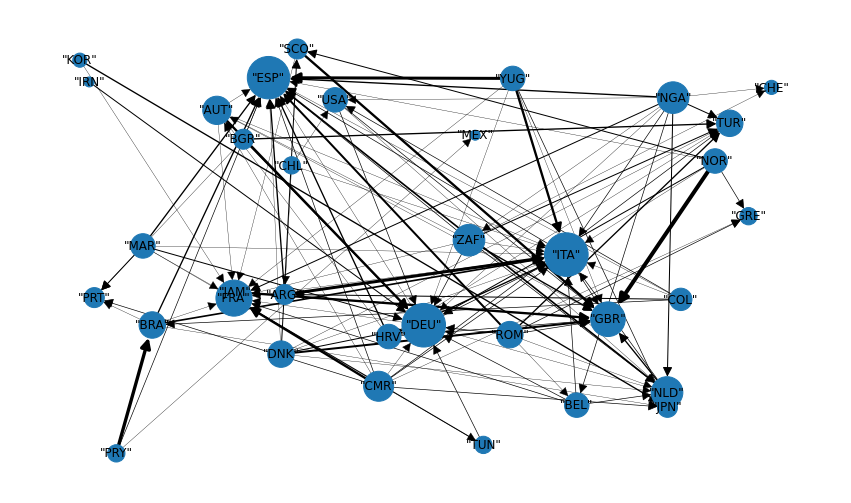

In [238]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
plot_options = {"node_size": [v * 100 for v in d.values()], "with_labels": True, "width": [w/3 for w in widths], "arrowsize": 20}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Spain (ESP) and Germany (DEU) are leading football player importers, whereas such countries as Yugoslavia (YUG) only exports players. 

## Shortest path length

In [239]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [240]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

NetworkXError: Found infinite path length because the digraph is not strongly connected

Text(0, 0.5, 'Frequency (%)')

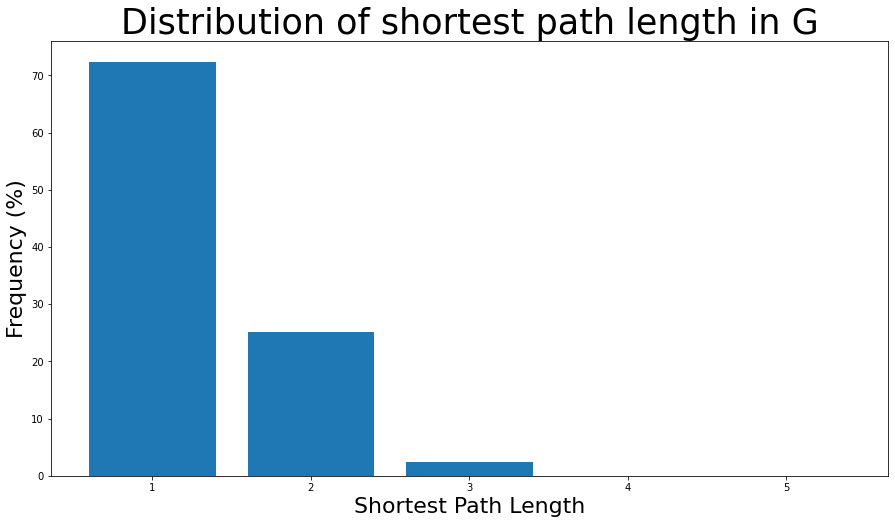

In [241]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})

## Centrality measures

In [242]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('"ITA"', 0.5588235294117647),
 ('"DEU"', 0.5588235294117647),
 ('"ESP"', 0.5294117647058824),
 ('"FRA"', 0.38235294117647056),
 ('"GBR"', 0.3529411764705882),
 ('"NLD"', 0.29411764705882354),
 ('"NGA"', 0.29411764705882354),
 ('"ZAF"', 0.29411764705882354)]

Text(0, 0.5, 'Counts')

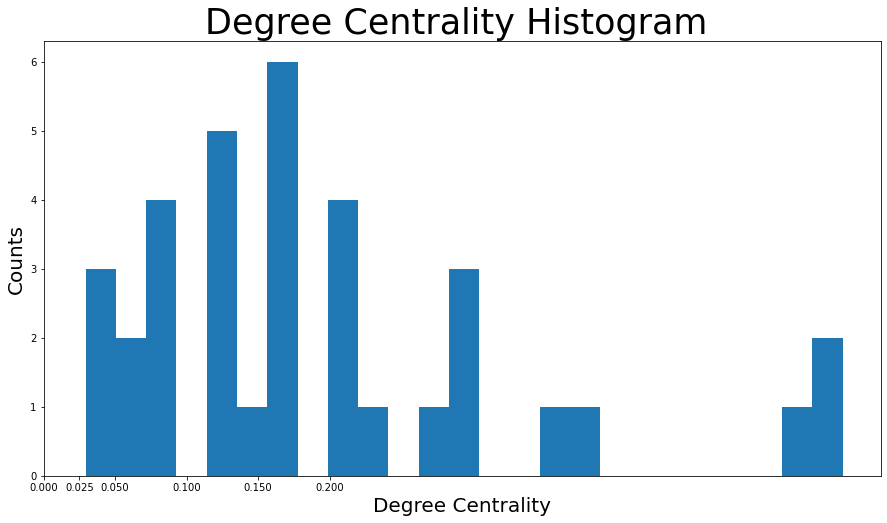

In [243]:
plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-0.9606273339215043,
 1.0418620552655058,
 -1.1930211000028375,
 1.0313172905060528)

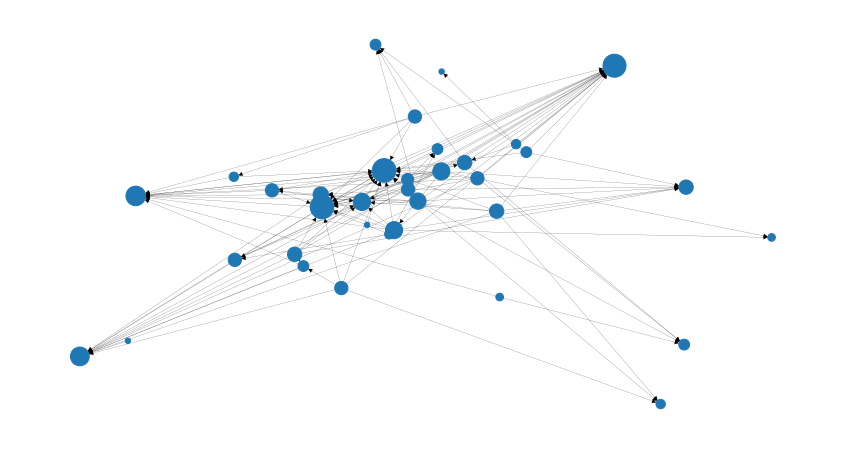

In [244]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
node_size =  [v * 1000 for v in degree_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')